# 회귀_실습_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [4]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


In [ ]:
model = Sequential( [Dense(9, input_shape=(nfeatures,), activation='relu'),
                     Dense(3, activation='relu')
                     Dense(1aaa) ])

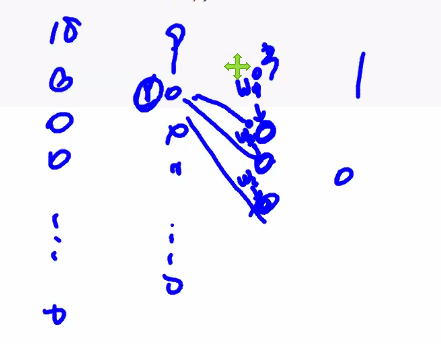

### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

18

In [ ]:
clear_session()

model = Sequential([ Dense(18, input_shape=(nfeatures,), activation='relu'),
                     Dense(5, activation = 'relu'),
                     Dense(1)
                     ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 5)                 95        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 443 (1.73 KB)
Trainable params: 443 (1.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1) ,loss='mse') # 오차를 최소화하는 가중치 찾는 방법 adam으로 하겠다
hist = model.fit(x_train, y_train, epochs=100, validation_split=.2, verbose=1).history

Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 3.4664 - val_loss: 2.0083
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 1.5023 - val_loss: 1.9347
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.9279 - val_loss: 1.7086
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7802 - val_loss: 1.5723
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6937 - val_loss: 1.5590
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6613 - val_loss: 1.6580
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6864 - val_loss: 1.6176
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5987 - val_loss: 1.6339
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5648 - val_loss: 1.6006
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5586 - val_loss: 1.5634
Epoch 11/100
8/8 [==========

* 학습곡선

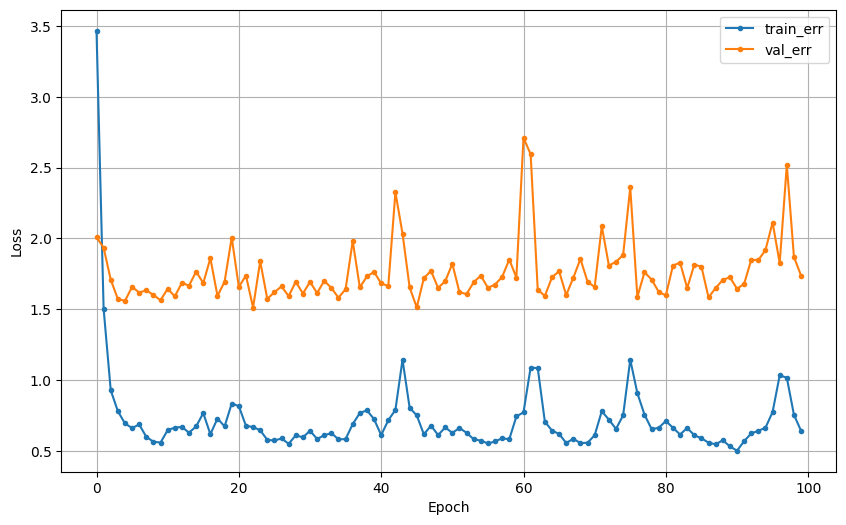

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred = model.predict(x_val)

print(mean_squared_error(y_val, pred, squared=False))
print(mean_absolute_error(y_val, pred))
print(mean_absolute_percentage_error(y_val, pred))

3/3 [==============================] - 0s 3ms/step
1.4395841793154158
1.202436527967453
152875361212825.9


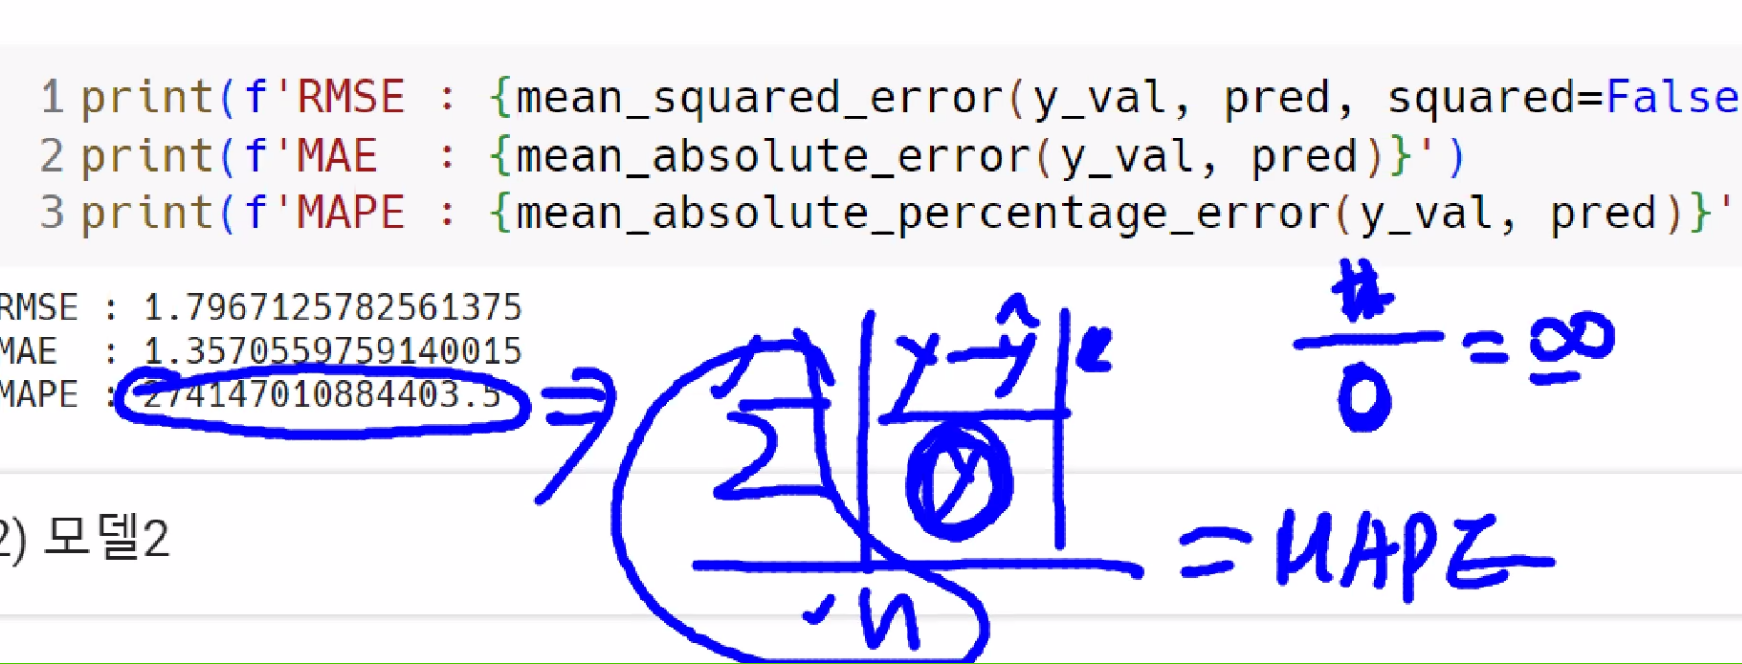